# Deep Neural Network for MNIST Classification
The dataset is called MNIST and refers to handwritten digit recognition.
The dataset provides 70,000 images (28x28 pixels) of handwritten digits (1 digit per image).

## Evaluation:
Dũng: 100%

Đài: 100%

Hoàng: 95%

Ngọc: 90%

Thiên: 90%

Sơn: 85%

Hiếu: 80%

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Import library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

## Load MNIST datasets

In [ ]:
mnist_dataset, mnist_info = tfds.load(name='mnist', with_info=True, as_supervised=True)

Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]

Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


## Dataset Information and Data Processing


In [ ]:
mnist_info

tfds.core.DatasetInfo(
    name='mnist',
    full_name='mnist/3.0.1',
    description="""
    The MNIST database of handwritten digits.
    """,
    homepage='http://yann.lecun.com/exdb/mnist/',
    data_dir='/root/tensorflow_datasets/mnist/incomplete.6GLIGY_3.0.1/',
    file_format=tfrecord,
    download_size=11.06 MiB,
    dataset_size=21.00 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann.lecun.com/exdb/mnist},
      volume={2},
      year={2010}
    }""

In [ ]:
mnist_train, mnist_test = mnist_dataset['train'], mnist_dataset['test']

# Trích một phần dữ liệu của train làm vadilation, chiếm 0.15 trong tập training
num_validation_samples = 0.1 * mnist_info.splits['train'].num_examples
num_validation_samples = tf.cast(num_validation_samples, tf.int64)

num_test_samples = mnist_info.splits['test'].num_examples
num_test_samples = tf.cast(num_test_samples, tf.int64)

def scale(image, label):
    image = tf.cast(image, tf.float32)
    image /= 255.
    return image, label

scaled_train_and_validation_data = mnist_train.map(scale)

test_data = mnist_test.map(scale)

### Train spilit into Validation

In [ ]:
# Xáo trộn dữ liệu, và tiến hành tách
BUFFER_SIZE = 10000

shuffled_train_and_validation_data = scaled_train_and_validation_data.shuffle(BUFFER_SIZE)

validation_data = shuffled_train_and_validation_data.take(num_validation_samples)
train_data = shuffled_train_and_validation_data.skip(num_validation_samples)


In [ ]:
# Số lượng và tỷ lệ giữa các phần
datasetsum = (mnist_info.splits['train'].num_examples+mnist_info.splits['test'].num_examples)
# Số lượng tập training
print(mnist_info.splits['train'].num_examples - num_validation_samples,f"Ty le : {(mnist_info.splits['train'].num_examples - num_validation_samples)/datasetsum} ")
# Số lượng tập validation
print(num_validation_samples,f"Ty le : {num_validation_samples/datasetsum}")
# Số lượng tập test
print(num_test_samples,f"Ty le : {num_test_samples/datasetsum}")

tf.Tensor(54000, shape=(), dtype=int64) Ty le : 0.7714285714285715 
tf.Tensor(6000, shape=(), dtype=int64) Ty le : 0.08571428571428572
tf.Tensor(10000, shape=(), dtype=int64) Ty le : 0.14285714285714285


In [ ]:
BATCH_SIZE = 100

train_data = train_data.batch(BATCH_SIZE)
validation_data = validation_data.batch(num_validation_samples)
test_data = test_data.batch(num_test_samples)

validation_inputs, validation_targets = next(iter(validation_data))
test_inputs, test_targets = next(iter(test_data))

In [ ]:
validation_inputs.shape

TensorShape([6000, 28, 28, 1])

In [ ]:
test_inputs.shape

TensorShape([10000, 28, 28, 1])

## Visualize Dataset

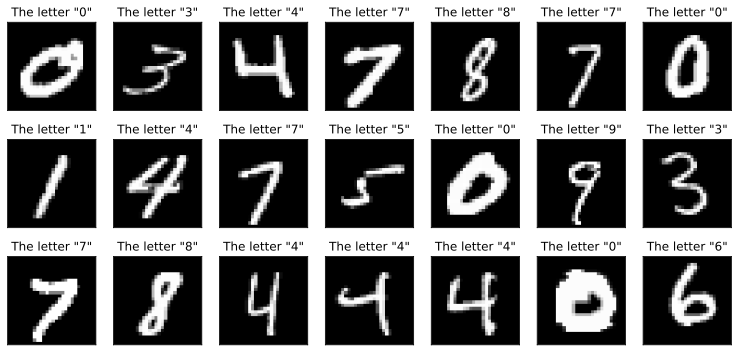

In [ ]:
fig,axs = plt.subplots(3,7,figsize=(13,6))

for i,ax in enumerate(axs.flatten()):

  # pick a random pic
  whichpic = np.random.randint(num_validation_samples)

  # extract the image and its target letter
  I = np.squeeze( validation_inputs.numpy()[whichpic,:,:] )
  letter = validation_targets.numpy()[whichpic]

  # visualize
  ax.imshow(I,cmap='gray')
  ax.set_title('The letter "%s"'%letter)
  ax.set_xticks([])
  ax.set_yticks([])

plt.show()

## Training Model

In [ ]:
model = Sequential()


model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(28, 28, 1), activation='relu',))


model.add(MaxPool2D(pool_size=(2, 2)))


model.add(Flatten())


model.add(Dense(128, activation='relu'))


model.add(Dense(10, activation='softmax'))


model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 5408)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               692352    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693962 (2.65 MB)
Trainable params: 693962 (2.65 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [ ]:
# model.fit(train_data, epochs = 10, validation_data=(validation_inputs, validation_targets),callbacks=[early_stop])
model.fit(train_data, epochs = 100, validation_data=(validation_inputs, validation_targets))

Epoch 1/100
540/540 [==============================] - 32s 56ms/step - loss: 0.2160 - accuracy: 0.9369 - val_loss: 0.0910 - val_accuracy: 0.9747
Epoch 2/100
540/540 [==============================] - 31s 55ms/step - loss: 0.0698 - accuracy: 0.9785 - val_loss: 0.0662 - val_accuracy: 0.9800
Epoch 3/100
540/540 [==============================] - 32s 57ms/step - loss: 0.0465 - accuracy: 0.9865 - val_loss: 0.0461 - val_accuracy: 0.9862
Epoch 4/100
540/540 [==============================] - 30s 54ms/step - loss: 0.0348 - accuracy: 0.9895 - val_loss: 0.0406 - val_accuracy: 0.9877
Epoch 5/100
540/540 [==============================] - 30s 54ms/step - loss: 0.0268 - accuracy: 0.9918 - val_loss: 0.0325 - val_accuracy: 0.9898
Epoch 6/100
540/540 [==============================] - 31s 57ms/step - loss: 0.0199 - accuracy: 0.9943 - val_loss: 0.0266 - val_accuracy: 0.9928
Epoch 7/100
540/540 [==============================] - 31s 56ms/step - loss: 0.0182 - accuracy: 0.9946 - val_loss: 0.0257 - val_ac

## Evaluate the Model

In [ ]:
model.metrics_names

['loss', 'accuracy']

In [ ]:
losses = pd.DataFrame(model.history.history)

In [ ]:
losses.head()

,loss,accuracy,val_loss,val_accuracy
0,0.215958,0.936944,0.091025,0.974667
1,0.069846,0.978481,0.066167,0.980000
2,0.046459,0.986481,0.046120,0.986167
3,0.034803,0.989500,0.040628,0.987667
4,0.026822,0.991759,0.032497,0.989833


<Axes: >

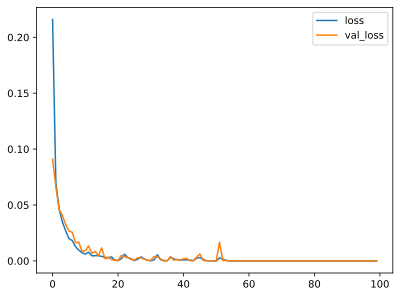

In [ ]:
losses[['loss','val_loss']].plot()

<Axes: >

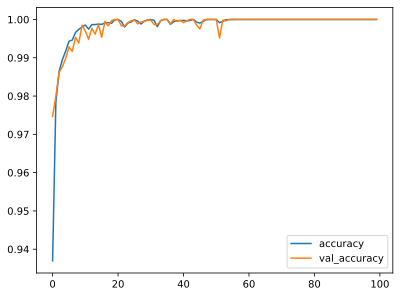

In [ ]:
losses[['accuracy','val_accuracy']].plot()

Nhận xét: Qúa trình huấn luyện đạt hiệu quả với độ chính xác cao, và không bị overfitting hay underfitting.

## Store model

In [ ]:
# Save the entire model using HDF5 format
model.save('/content/drive/MyDrive/AI/model.keras')

In [ ]:
# Restore the model
restored_model = tf.keras.models.load_model('/content/drive/MyDrive/AI/model.keras')
# Use the restored model for predictions or further training

In [ ]:
restored_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 5408)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               692352    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693962 (2.65 MB)
Trainable params: 693962 (2.65 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

In [ ]:
np.argmax(restored_model.predict(test_inputs),axis=1)

313/313 [==============================] - 2s 6ms/step


array([2, 0, 4, ..., 8, 0, 5])

## Store Weight

In [ ]:
# Save the model weights
model.save_weights('/content/drive/MyDrive/AI/model_weights.keras')

In [ ]:
# Load the model weights
model.load_weights('/content/drive/MyDrive/AI/model_weights.keras')

## Test the model

In [ ]:
test_loss, test_accuracy = model.evaluate(test_data)

1/1 [==============================] - 3s 3s/step - loss: 0.0967 - accuracy: 0.9891


In [ ]:
print('Test loss: {0:.2f}. Test accuracy: {1:.2f}%'.format(test_loss, test_accuracy*100.))

Test loss: 0.10. Test accuracy: 98.91%


In [ ]:
yHat = model.predict(test_inputs)

313/313 [==============================] - 4s 13ms/step


In [ ]:
yHat

array([[0.0000000e+00, 2.1339460e-37, 9.9999994e-01, ..., 0.0000000e+00,
        6.4420332e-34, 0.0000000e+00],
       [9.9999994e-01, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        4.1413591e-38, 0.0000000e+00],
       [0.0000000e+00, 3.0789487e-37, 0.0000000e+00, ..., 4.1046050e-37,
        0.0000000e+00, 6.1521840e-29],
       ...,
       [5.8879112e-34, 0.0000000e+00, 1.0930032e-28, ..., 0.0000000e+00,
        9.9999994e-01, 1.6244963e-32],
       [9.9999994e-01, 4.4435128e-34, 3.5804990e-28, ..., 7.5059981e-35,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        3.9222423e-25, 2.4855087e-21]], dtype=float32)

In [ ]:
predictions = np.argmax(yHat,axis=1)

In [ ]:
predictions

array([2, 0, 4, ..., 8, 0, 5])

In [ ]:
test_targets.numpy()

array([2, 0, 4, ..., 8, 0, 5])

In [ ]:
print(classification_report(test_targets.numpy(),predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      1.00      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



Nhận xét: Độ chính xác trung bình với tập test của mô hình khá cao khoảng 0.99. Các tham số khác precision, recall, f-score cũng khá cao. Chứng tỏ mô hình được train hiệu quả.

In [ ]:
confusion_matrix(test_targets.numpy(),predictions)

array([[ 974,    0,    3,    0,    0,    0,    2,    1,    0,    0],
       [   0, 1127,    0,    3,    0,    0,    3,    1,    1,    0],
       [   2,    2, 1018,    0,    2,    0,    1,    4,    2,    1],
       [   0,    0,    2, 1003,    0,    3,    0,    1,    1,    0],
       [   0,    0,    0,    0,  978,    0,    0,    1,    0,    3],
       [   0,    0,    1,    7,    0,  881,    1,    0,    2,    0],
       [   5,    3,    0,    0,    1,    2,  945,    0,    2,    0],
       [   1,    1,    6,    0,    0,    0,    0, 1016,    2,    2],
       [   4,    0,    1,    2,    0,    2,    1,    1,  960,    3],
       [   1,    2,    0,    1,    9,    4,    0,    2,    1,  989]])

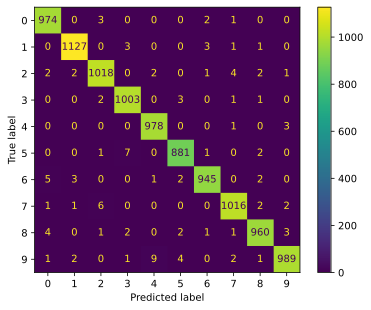

In [ ]:
ConfusionMatrixDisplay(confusion_matrix(test_targets.numpy(),predictions)).plot()

## Predicting a given image

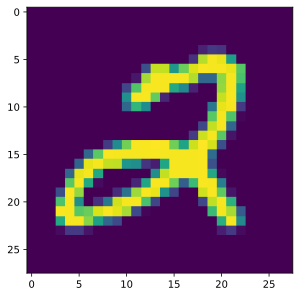

In [ ]:
my_number = test_inputs[0]
plt.imshow(np.reshape(my_number,(28,28)))

In [ ]:
predictions[0]

2

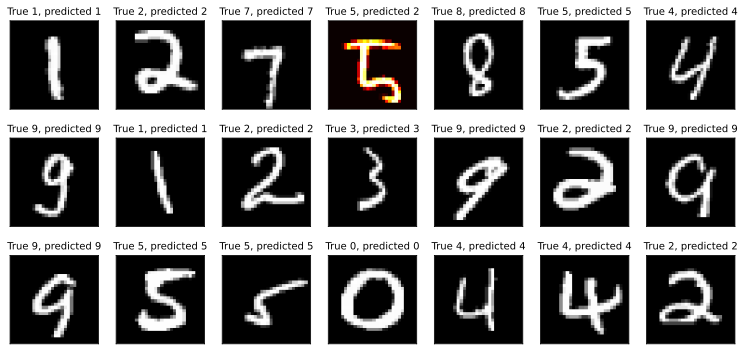

In [ ]:
fig,axs = plt.subplots(3,7,figsize=(13,6))

for i,ax in enumerate(axs.flatten()):

  # pick a random pic
  whichpic = np.random.randint(num_test_samples)

  # extract the image and its target letter
  I = np.squeeze( test_inputs.numpy()[whichpic,:,:] )
  trueLetter = test_targets.numpy()[whichpic]
  predLetter = np.argmax(yHat[whichpic,:])

  # color-code the accuracy (using ternary operator)
  col = 'gray' if trueLetter==predLetter else 'hot'

  # visualize
  ax.imshow(I,cmap=col)
  ax.set_title('True %s, predicted %s' %(trueLetter,predLetter),fontsize=10)
  ax.set_xticks([])
  ax.set_yticks([])

plt.show()